# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [4]:
df = pd.read_csv('bank_fin\\bank_fin.csv', sep = ';')

# Исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?

In [5]:
missing_per_column = df.isnull().sum()
missing_per_column = missing_per_column[missing_per_column > 0]
print(f"Столбцы с пропущенными значениями и их количество: {missing_per_column}")

Столбцы с пропущенными значениями и их количество: balance    25
dtype: int64


### Задание 2

# Есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?

In [6]:
for job in df['job'].unique():
    print(job)

admin.
technician
services
management
retired
blue-collar
unemployed
entrepreneur
housemaid
unknown
self-employed
student


### Задание 3

# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)

In [9]:
df['balance'] = df['balance'].astype(str) \
    .str.replace(' ', '') \
    .str.replace(',', '.') \
    .str.replace('$', '') \
    .astype(float)
mean_balance = round(df['balance'].mean(), 3)
formatted_balance = f"{mean_balance:.3f}".rstrip('0').rstrip('.')

print(f'Среднее значение с округлением до 3 знаков: {formatted_balance}')

Среднее значение с округлением до 3 знаков: 1529.129


### Задание 4

# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку

In [10]:
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')
median_balance = df['balance'].median()
print(f"Медианное значение баланса: {median_balance}")

df['balance'] = df['balance'].fillna(median_balance)

mean_balance = round(df['balance'].mean(), 3)
print(f"Среднее значение баланса: {mean_balance}")

Медианное значение баланса: 550.0
Среднее значение баланса: 1526.936


### Задание 5

# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения


In [11]:
# Для job
job_mode = df.loc[df['job'] != 'unknown', 'job'].mode()[0]
df['job'] = df['job'].replace('unknown', job_mode)

# Для education
education_mode = df.loc[df['education'] != 'unknown', 'education'].mode()[0]
df['education'] = df['education'].replace('unknown', education_mode)

# Выбираем нужных клиентов
popular_clients = df[(df['job'] == job_mode) & (df['education'] == education_mode)]

# Считаем средний баланс, округляем до трёх знаков
mean_balance_popular = round(popular_clients['balance'].mean(), 3)
print(f'Средний баланс популярных клиентов: {mean_balance_popular}')

Средний баланс популярных клиентов: 1598.883


### Задание 6

# удалите все выбросы для признака balance

In [12]:

# 1. Квартиль и IQR
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# 2. Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Нижняя граница: {lower_bound}')
print(f'Верхняя граница: {upper_bound}')

# 3. Фильтрация — оставим только значения в этих пределах
df_no_outliers = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# Проверим результат — например, количество строк до и после фильтрации
print('Число строк до фильтрации:', len(df))
print('Число строк после фильтрации:', len(df_no_outliers))

Нижняя граница: -2241.0
Верхняя граница: 4063.0
Число строк до фильтрации: 11162
Число строк после фильтрации: 10105


## Часть 2:  Разведывательный анализ

### Задание 1

# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат

deposit
no     5873
yes    5289
Name: count, dtype: int64


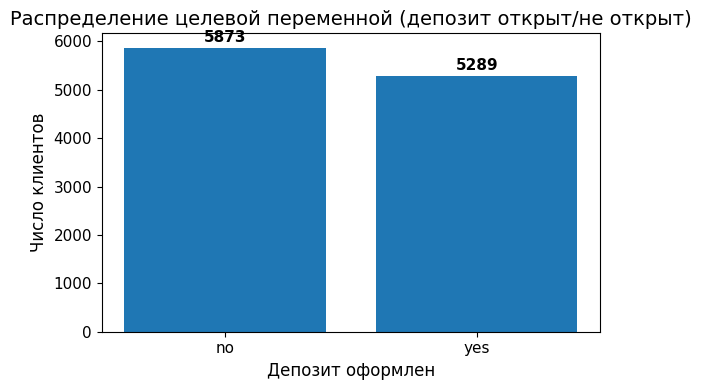

In [13]:
deposit_counts = df['deposit'].value_counts()
print(deposit_counts)

plt.figure(figsize=(6,4))
bars = plt.bar(deposit_counts.index, deposit_counts.values)
plt.title('Распределение целевой переменной (депозит открыт/не открыт)', fontsize=14)
plt.xlabel('Депозит оформлен', fontsize=12)
plt.ylabel('Число клиентов', fontsize=12)

# Оформим подписи на столбиках
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

### Задания 2 и 3

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

### Задания 4 и 5

In [ ]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

### Задание 6

In [ ]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код

### Задание 7

In [ ]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код

### Задание 8

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

### Задания 9 и 10

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

### Задание 11

In [ ]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

## Часть 3: преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования

### Задания 2 и 3

In [ ]:
# преобразуйте бинарные переменные в представление из нулей и единиц

### Задание 4

In [ ]:
# создайте дамми-переменные

### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

### Задания 7 и 8

In [3]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
# рассчитайте необходимые показатели

### Задание 9

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

### Задание 10

In [ ]:
# нормализуйте данные с помощью minmaxsxaler

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества

### Задания 2,3,4

In [ ]:
# обучите решающие деревья, настройте максимальную глубину

### Задание 5

In [ ]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [4]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna